# Tasks
Use the dataset available on Moodle and discuss the relationship between the variables for the life expectancy using 
1) Linear Regression

2) Ridge Regression

3) Lasso Regression

4) Regression using Decision Tree and RandomForest

(Online availability of dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who/)

# 1.Before starting with the taks let's explore a bit this dataset:

In [1]:
#Imports for data hadling
import numpy as np
import pandas as pd
import seaborn as sb
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats.mstats import winsorize

%matplotlib inline

In [2]:

df = pd.read_csv("Life_Expectancy_Data.csv")



# Display first 5 records
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Renaming columns as Python doesn't likes spaces in between:

In [3]:
#Renaming column headers + Confirming Dataset using head. It should 22 columns of few rows
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.head(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
#Checking structure of Dataset, Quantitive and Qualititive features of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [5]:
df.shape

(2938, 22)

In [6]:
#For Categorical to Numerical data saving unique values for confirmation
df_bckup=df
print(len(df['Country'].unique()))
print(len(df['Status'].unique()))
#print(data)

193
2


In [7]:
#To handle null value and outliers need to check correlation before loosing important data
#To Check correlation all data should be nominal converting categorical to numerical and showing relation
#Using sklearn preprocessing to encode

status=preprocessing.LabelEncoder()
status.fit(df.Status.unique())
df['Status']=status.transform(df['Status'])
country=preprocessing.LabelEncoder()
country.fit(df.Country.unique())
df['Country']=country.transform(df['Country'])

df.info()
#data.head()
#print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   int32  
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   int32  
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [8]:
#Checking unique value count it should not have any mismatch
print(len(df['Country'].unique()))
print(len(df['Status'].unique()))

193
2


In [9]:
#Checking correlation across all 22 columns
correlation=df.corr()
correlation

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Country,1.000000,0.001342,-0.031635,-0.016763,0.039802,-0.030528,-0.062134,-0.032983,-0.020741,-0.024593,...,0.017807,0.055374,-0.006138,0.090206,-0.016841,-0.016669,0.008049,0.022687,-0.024503,-0.026167
Year,0.001342,1.000000,0.001864,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,...,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Status,-0.031635,0.001864,1.000000,-0.482136,0.315284,0.112252,-0.596660,-0.454261,-0.115317,0.076955,...,-0.220250,-0.299990,-0.216913,0.148590,-0.478339,0.045801,0.368389,0.366751,-0.478402,-0.514045
Life_Expectancy,-0.016763,0.170033,-0.482136,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,...,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult_Mortality,0.039802,-0.079052,0.315284,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,...,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
Infant_Deaths,-0.030528,-0.037415,0.112252,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,...,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.062134,-0.052990,-0.596660,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,...,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage_Exp,-0.032983,0.031400,-0.454261,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,...,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,-0.020741,0.104333,-0.115317,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,...,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.024593,-0.082493,0.076955,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,...,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225


# 2.Data Preparation

[2.1] Data Cleaning => Handling Null and Erroneous Values

In [10]:
#Checking null values
(df.isnull().sum()).sort_values(ascending=False)

Population                  652
HepatitisB                  553
GDP                         448
Tot_Exp                     226
Alcohol                     194
Income_Comp_Of_Resources    167
Schooling                   163
thinness_5to9_years          34
thinness_1to19_years         34
BMI                          34
Polio                        19
Diphtheria                   19
Life_Expectancy              10
Adult_Mortality              10
HIV/AIDS                      0
Country                       0
Year                          0
Measles                       0
Percentage_Exp                0
Infant_Deaths                 0
Status                        0
Under_Five_Deaths             0
dtype: int64

In [11]:
###Plenty of null values in dataset
#Checking erroneous values
df.describe()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,95.096324,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,56.244904,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,93.000000,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,145.000000,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


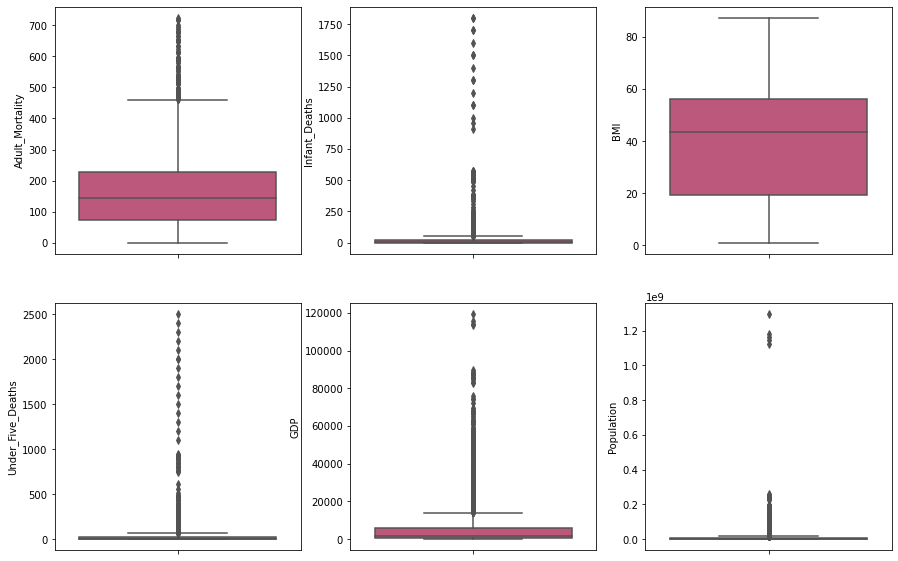

In [12]:
###Seems Error in Few Data like Population 34 only, Adult Mortality value 1!!! 
#Checking boxplot [Using seaborn] of columns has suspicious/implicit-missing values 

plt.figure(figsize=(15,10))
for i, col in enumerate(['Adult_Mortality', 'Infant_Deaths', 'BMI', 'Under_Five_Deaths', 'GDP', 'Population'], start=1):
    plt.subplot(2,3,i)
    sb.boxplot(y=df[col],palette='plasma')

plt.show()

In [13]:
#Some errors and ouliers detected like Infant death = 0, Under Five Death = 0, etc; Needs to be fixed
#Instead directly going to null value handling, fixing errors by using more relavant method heres as per
#Observingvariety of gaps/ranges here

#For Adult Mortality handling dropping 5th percentile
percentile_5th = np.percentile(df.Adult_Mortality.dropna(), 5)
df.Adult_Mortality = df.apply(lambda x: np.nan if x.Adult_Mortality < percentile_5th else x.Adult_Mortality, axis=1)

#Placing null values under frame of wherever 50 < BMI < 10
df.BMI = df.apply(lambda x: np.nan if (x.BMI < 10 or x.BMI > 50) else x.BMI, axis=1)

#Placing null value inplace of infant deaths so can tackle in null value handling
df.Infant_Deaths = df.Infant_Deaths.replace(0, np.nan)

#Placing null value inplace of Under_Five_Deaths so can tackle in null value handling
df.Under_Five_Deaths = df.Under_Five_Deaths.replace(0, np.nan)

In [14]:
#Checking decent number of null values
(df.isnull().sum()).sort_values(ascending=False)

BMI                         1456
Infant_Deaths                848
Under_Five_Deaths            785
Population                   652
HepatitisB                   553
GDP                          448
Tot_Exp                      226
Alcohol                      194
Income_Comp_Of_Resources     167
Schooling                    163
Adult_Mortality              155
thinness_1to19_years          34
thinness_5to9_years           34
Polio                         19
Diphtheria                    19
Life_Expectancy               10
Measles                        0
Year                           0
Percentage_Exp                 0
HIV/AIDS                       0
Status                         0
Country                        0
dtype: int64

In [15]:
#BMI is having very large quantity of null values which completely can deflect the model 
#If we remove rows than almost 50% data will be lost, Bad idea!
#By checking correlation, we found that BMI is not having any stronger correlation with other features maximum .4 which won't impact.
#Better to remove this feature

df.drop(columns='BMI', inplace=True)

#Checking remaining nulls
(df.isnull().sum()).sort_values(ascending=False)

Infant_Deaths               848
Under_Five_Deaths           785
Population                  652
HepatitisB                  553
GDP                         448
Tot_Exp                     226
Alcohol                     194
Income_Comp_Of_Resources    167
Schooling                   163
Adult_Mortality             155
thinness_1to19_years         34
thinness_5to9_years          34
Polio                        19
Diphtheria                   19
Life_Expectancy              10
Measles                       0
Year                          0
Percentage_Exp                0
HIV/AIDS                      0
Status                        0
Country                       0
dtype: int64

In [16]:
#Checking remaining null values columns; take Population, GDP, Income_Comp_Of_Resources, Schooling, Alcohol consumption.
#Which are not indirectly related to health and can be imputed by interpolate method
Inter_cols = ['Population', 'GDP', 'Income_Comp_Of_Resources', 'Schooling', 'Alcohol']

for x in Inter_cols:
    df.loc[:, x] = df.loc[:, x].interpolate()

#Checking remaining nulls
(df.isnull().sum()).sort_values(ascending=False)

Infant_Deaths               848
Under_Five_Deaths           785
HepatitisB                  553
Tot_Exp                     226
Adult_Mortality             155
thinness_5to9_years          34
thinness_1to19_years         34
Polio                        19
Diphtheria                   19
Life_Expectancy              10
HIV/AIDS                      0
Income_Comp_Of_Resources      0
Population                    0
GDP                           0
Country                       0
Year                          0
Measles                       0
Percentage_Exp                0
Alcohol                       0
Status                        0
Schooling                     0
dtype: int64

In [17]:
#Now for rest of the missing values, we can fill by mean taken from grouping by Country [region based] or Year [Time based]
#If we choose Country here, then it is superset so single feature for single country will have same value each year
#Year based is feasible here

impt_value = []
for Year in list(df.Year.unique()):
    Yr_data = df[df.Year == Year].copy()
    for column in list(Yr_data.columns)[3:]:
        Yr_data[column] = Yr_data[column].fillna(Yr_data[column].dropna().mean()).copy()
    impt_value.append(Yr_data)
df = pd.concat(impt_value).copy()

#Checking remaining nulls
(df.isnull().sum()).sort_values(ascending=False)

Country                     0
Polio                       0
Income_Comp_Of_Resources    0
thinness_5to9_years         0
thinness_1to19_years        0
Population                  0
GDP                         0
HIV/AIDS                    0
Diphtheria                  0
Tot_Exp                     0
Under_Five_Deaths           0
Year                        0
Measles                     0
HepatitisB                  0
Percentage_Exp              0
Alcohol                     0
Infant_Deaths               0
Adult_Mortality             0
Life_Expectancy             0
Status                      0
Schooling                   0
dtype: int64

In [18]:
(df.isnull().sum()).sort_values(ascending=False)

Country                     0
Polio                       0
Income_Comp_Of_Resources    0
thinness_5to9_years         0
thinness_1to19_years        0
Population                  0
GDP                         0
HIV/AIDS                    0
Diphtheria                  0
Tot_Exp                     0
Under_Five_Deaths           0
Year                        0
Measles                     0
HepatitisB                  0
Percentage_Exp              0
Alcohol                     0
Infant_Deaths               0
Adult_Mortality             0
Life_Expectancy             0
Status                      0
Schooling                   0
dtype: int64

[2.2] Exploraing/Analysing the DataSe

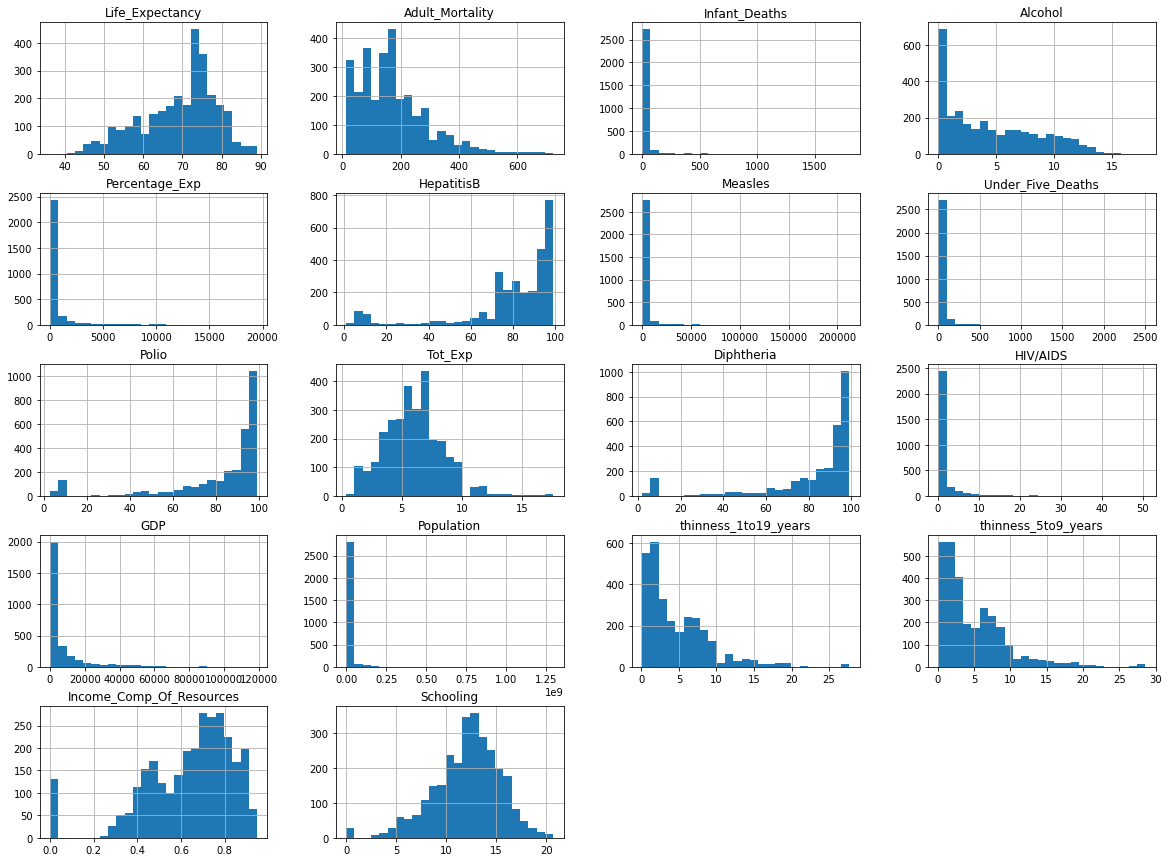

In [19]:
#Giving visuality to data for determining
#Dropping the categorical variable to plot histogram and boxplot.
df_num = df.drop(columns=["Year","Country","Status"])

# Storing numerical column list into a variable
num_col = df.columns.tolist()

#Plotting histogram for all numerical variables of dataframe to find the distribution
# Set background color of corr matrix to White
# sb.set_theme(style="white")

# Draw the hist plot with numerical variables
df_num.hist(bins=25, figsize=(20,15))
plt.show()

In [20]:
df_num

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,65.0,263.0,62.000000,0.010,71.279624,65.000000,1154,83.000000,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
16,77.8,74.0,35.129032,4.600,364.975229,99.000000,0,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
32,75.6,19.0,21.000000,1.835,0.000000,95.000000,63,24.000000,95.0,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
48,52.4,335.0,66.000000,4.290,0.000000,64.000000,118,98.000000,7.0,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,76.4,13.0,35.129032,5.205,0.000000,99.000000,0,44.844961,86.0,7.08,99.0,0.2,13566.954100,4.102150e+06,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2873,72.5,168.0,11.000000,8.010,0.000000,5.000000,22,13.000000,86.0,4.91,77.0,0.1,1418.923597,6.526471e+04,1.8,1.7,0.670,10.6
2889,73.4,139.0,33.000000,1.600,0.000000,74.035294,16512,43.000000,96.0,4.89,96.0,0.1,1367.998045,1.119664e+05,15.8,16.4,0.569,10.4
2905,68.0,252.0,48.000000,0.070,0.000000,14.000000,0,66.000000,74.0,4.14,74.0,0.1,1317.072493,1.586681e+05,14.1,14.1,0.436,7.7
2921,43.8,614.0,44.000000,2.620,45.616880,74.035294,30930,72.000000,85.0,7.16,85.0,18.7,341.955625,1.531221e+06,7.5,7.5,0.418,9.6


In [21]:
df_num.columns

Index(['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol',
       'Percentage_Exp', 'HepatitisB', 'Measles', 'Under_Five_Deaths', 'Polio',
       'Tot_Exp', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness_1to19_years', 'thinness_5to9_years',
       'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [22]:
print(df_num[col])

0       3.373649e+07
16      2.887300e+04
32      3.987153e+07
48      2.785935e+06
64      4.102150e+06
            ...     
2873    6.526471e+04
2889    1.119664e+05
2905    1.586681e+05
2921    1.531221e+06
2937    1.222225e+07
Name: Population, Length: 2938, dtype: float64


KeyError: 'Country'

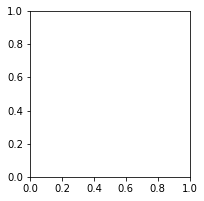

In [23]:
#Ploting Box plot across all the numerical columns

# Set up the matplotlib figure
plt.figure(figsize=(20,25))

# Set background color of corr matrix to White
# sb.set_theme(style="white")

#Loping over the numerical columns to draw boxplot
for i,col in enumerate(num_col):
    plt.subplot(7,6,i+1)
    sb.boxplot(y = df_num[col],palette='plasma')

plt.show()

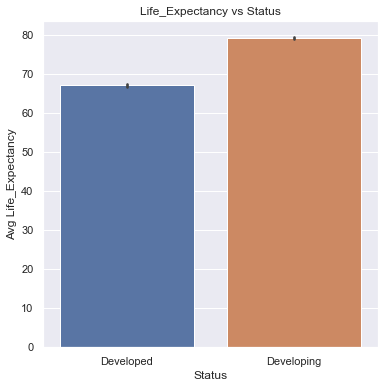

,Life_Expectancy
Status,
Developed,67.13
Developing,79.20


In [24]:
#As we have encoded Status Feture for correlation decoding here
df['Status'] = df['Status'].replace([0, 1], ['Developing', 'Developed'])
# Set up the seaborn figure
sb.set(rc={'figure.figsize':(6,6)})

#Draw the barplot with country status and life expectancy variable
sb.barplot(data=df, y='Life_Expectancy',x='Status', orient = 'v')

#Adding the lable and title to the plot
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy vs Status")

plt.show()

#Finding thethe average life expectancy between both status. 
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

C:\Users\jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


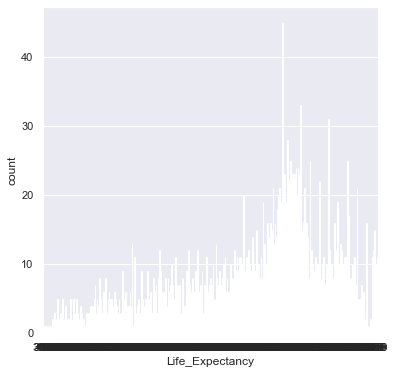

In [26]:
#Life Expectancy Range and it's pick
sb.countplot(df['Life_Expectancy'])

sb.set(rc={'figure.figsize':(8,8)})
plt.show()

[3] Feature Engineering

<AxesSubplot:>

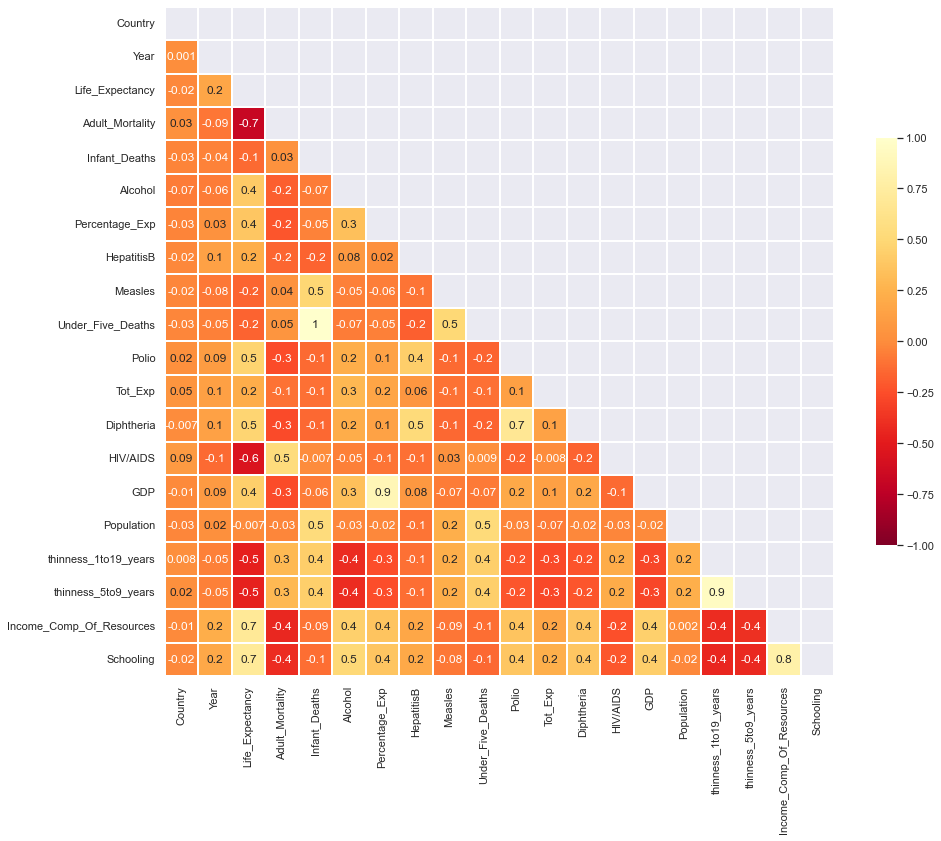

In [27]:
#Checking current dataset with no outliers and no nulls
#BMI we already have remove in previuos phase
#Plotting correlation before going further

#Using seaborn for better visualisation of correlation
#imports for graph

correlation=df.corr()
correlation

#Plot a graph
sb.set(font_scale=1)
# sb.set_theme(style="white")
mask = np.triu(correlation)
plt.figure(figsize=(15,15))
# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(correlation, mask=mask, cmap="YlOrRd_r", vmax=1,vmin = -1,center=0, annot=True,
           square=True, fmt = '.1g', linewidths=.25, cbar_kws={"shrink": 0.5})

In [28]:
correlation=df.corr()
correlation

,Country,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Country,1.000000,0.001342,-0.016505,0.031207,-0.032397,-0.065494,-0.032983,-0.017530,-0.024593,-0.025075,0.017306,0.053247,-0.006778,0.090206,-0.014090,-0.027925,0.007957,0.022477,-0.011460,-0.023089
Year,0.001342,1.000000,0.170465,-0.089809,-0.042822,-0.063976,0.031400,0.133072,-0.082493,-0.051915,0.094799,0.129898,0.135093,-0.139741,0.090543,0.020222,-0.048182,-0.051262,0.224113,0.186023
Life_Expectancy,-0.016505,0.170465,1.000000,-0.686189,-0.133251,0.399146,0.381543,0.223382,-0.157714,-0.164741,0.461850,0.214891,0.475914,-0.556647,0.435644,-0.006923,-0.472746,-0.467217,0.690355,0.703198
Adult_Mortality,0.031207,-0.089809,-0.686189,1.000000,0.034363,-0.180982,-0.220342,-0.153423,0.036978,0.053370,-0.261424,-0.103316,-0.267573,0.536340,-0.262755,-0.027022,0.289675,0.293533,-0.433607,-0.413812
Infant_Deaths,-0.032397,-0.042822,-0.133251,0.034363,1.000000,-0.065034,-0.046782,-0.169779,0.486117,0.995195,-0.137422,-0.109706,-0.145858,-0.006776,-0.064704,0.532171,0.424951,0.430241,-0.094950,-0.122690
Alcohol,-0.065494,-0.063976,0.399146,-0.180982,-0.065034,1.000000,0.337787,0.082676,-0.050564,-0.068408,0.221851,0.281782,0.218046,-0.048292,0.342042,-0.029207,-0.421409,-0.410521,0.442584,0.507433
Percentage_Exp,-0.032983,0.031400,0.381543,-0.220342,-0.046782,0.337787,1.000000,0.018604,-0.056596,-0.050365,0.147373,0.161565,0.143811,-0.097857,0.871321,-0.016222,-0.251175,-0.252706,0.359596,0.369825
HepatitisB,-0.017530,0.133072,0.223382,-0.153423,-0.169779,0.082676,0.018604,1.000000,-0.100805,-0.180637,0.424059,0.056810,0.517235,-0.110052,0.075276,-0.098464,-0.114276,-0.117665,0.179636,0.191012
Measles,-0.024593,-0.082493,-0.157714,0.036978,0.486117,-0.050564,-0.056596,-0.100805,1.000000,0.494212,-0.136015,-0.106146,-0.141675,0.030899,-0.067454,0.229739,0.224731,0.221001,-0.087682,-0.082934
Under_Five_Deaths,-0.025075,-0.051915,-0.164741,0.053370,0.995195,-0.068408,-0.050365,-0.180637,0.494212,1.000000,-0.160142,-0.112365,-0.171254,0.008849,-0.070326,0.520560,0.430017,0.434069,-0.118794,-0.143783


In [30]:
correlation = df.corr().abs().unstack().drop_duplicates().sort_values(kind="quicksort", ascending = False)
correlation[1:10]

Infant_Deaths             Under_Five_Deaths           0.995195
thinness_1to19_years      thinness_5to9_years         0.939103
Percentage_Exp            GDP                         0.871321
Income_Comp_Of_Resources  Schooling                   0.803209
Life_Expectancy           Schooling                   0.703198
                          Income_Comp_Of_Resources    0.690355
                          Adult_Mortality             0.686189
Polio                     Diphtheria                  0.673609
Life_Expectancy           HIV/AIDS                    0.556647
dtype: float64

In [31]:
#Correlation between Target variable and other variables
feature_list=df.corr()['Life_Expectancy'].sort_values(kind="quicksort",ascending=False)
feature_list

Life_Expectancy             1.000000
Schooling                   0.703198
Income_Comp_Of_Resources    0.690355
Diphtheria                  0.475914
Polio                       0.461850
GDP                         0.435644
Alcohol                     0.399146
Percentage_Exp              0.381543
HepatitisB                  0.223382
Tot_Exp                     0.214891
Year                        0.170465
Population                 -0.006923
Country                    -0.016505
Infant_Deaths              -0.133251
Measles                    -0.157714
Under_Five_Deaths          -0.164741
thinness_5to9_years        -0.467217
thinness_1to19_years       -0.472746
HIV/AIDS                   -0.556647
Adult_Mortality            -0.686189
Name: Life_Expectancy, dtype: float64

In [32]:
#First 8 and last 6 highly correlated
print(feature_list.head(8))
print(feature_list.tail(6))

#Except Status top five and last five features selected
feature_list =['Schooling', 'Income_Comp_Of_Resources', 'Diphtheria','Alcohol','GDP', 'Polio','Measles', 'Percentage_Exp', 'thinness_5to9_years','thinness_1to19_years', 'HIV/AIDS', 'Adult_Mortality']

print(30*'*'+' Final selected features '+30*'*')
feature_list

Life_Expectancy             1.000000
Schooling                   0.703198
Income_Comp_Of_Resources    0.690355
Diphtheria                  0.475914
Polio                       0.461850
GDP                         0.435644
Alcohol                     0.399146
Percentage_Exp              0.381543
Name: Life_Expectancy, dtype: float64
Measles                -0.157714
Under_Five_Deaths      -0.164741
thinness_5to9_years    -0.467217
thinness_1to19_years   -0.472746
HIV/AIDS               -0.556647
Adult_Mortality        -0.686189
Name: Life_Expectancy, dtype: float64
****************************** Final selected features ******************************


['Schooling',
 'Income_Comp_Of_Resources',
 'Diphtheria',
 'Alcohol',
 'GDP',
 'Polio',
 'Measles',
 'Percentage_Exp',
 'thinness_5to9_years',
 'thinness_1to19_years',
 'HIV/AIDS',
 'Adult_Mortality']

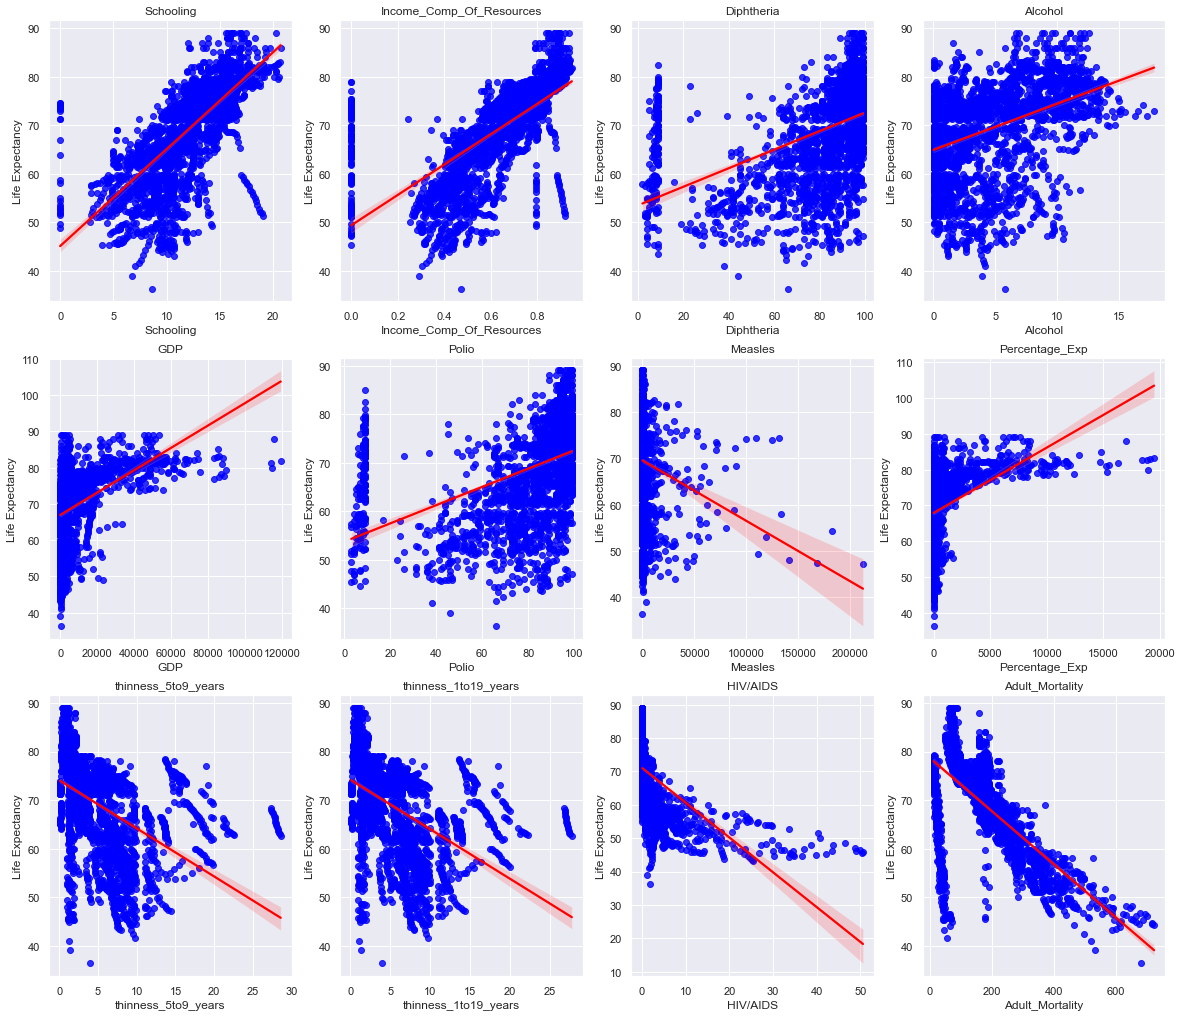

In [35]:
#Set the figure size
plt.figure(figsize=(20,30))

#Looping the feature cols from the above list and draw the plot with Target variable
for col_name in feature_list:
    #Draw subplot with index position from the feature list
    plt.subplot(5,4,(list(feature_list).index(col_name)+1))
    
    #Draw regplot for feature column as x with Target variable as y
    sb.regplot(x=df[col_name], y=df['Life_Expectancy'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    
    #Plot the title as column name
    plt.title(col_name)
    
    #Plot X,Y label
    plt.xlabel(col_name)
    plt.ylabel('Life Expectancy')

plt.show()

[4] Modeling & Testing

In [36]:
#Import sklearn pakages for modeling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

Spliting Data

In [38]:
#preparing list to compare all models
Model_Compare = [[]]

#prepare train and test data, taken 80% of Training Data and 20% of Test Data
X_feature=df[feature_list]
Y_label=df.Life_Expectancy 

X_feature_train,X_feature_test,Y_label_train,Y_label_test=train_test_split(X_feature,Y_label,test_size=0.2, 
                                     random_state=42, shuffle=True)

print('X_feature_training_set : ', X_feature_train.shape)
print('X_feature_test_set : ', X_feature_test.shape)
print('Y_label_train_set :', Y_label_train.shape) 
print('Y_label_test_set : ', Y_label_test.shape)

X_feature_training_set :  (2350, 12)
X_feature_test_set :  (588, 12)
Y_label_train_set : (2350,)
Y_label_test_set :  (588,)


In [39]:
#Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_feature_train,Y_label_train)

#Make predictions
Y_pred = lin_reg.predict(X_feature_train)

#Calculating MSE and RMSE
lr_train_mse = mean_squared_error(Y_label_train,Y_pred)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_r2_score = r2_score(Y_label_train,Y_pred)

#Testing Score
test_score = lin_reg.score(X_feature_test, Y_label_test)

print("Linear Regression:")
print("Mean squared error: %.2f"%lr_train_mse)
print("Root Mean Squared error: %.2f"%lr_train_rmse)
print("R^2 score for lin_reg training set: %.2f"%lr_r2_score)
print("Test-set score:",test_score)

# Model_Compare.append(['Linear Regression', round(lr_train_mse,3), round(lr_train_rmse,3), round(lr_r2_score, 3), round(test_score,3)])
Model_Compare[0] = ['Linear Regression', round(lr_train_mse,3), round(lr_train_rmse,3), round(lr_r2_score, 3), round(test_score,3)]
#print(Model_Compare)

Linear Regression:
Mean squared error: 18.14
Root Mean Squared error: 4.26
R^2 score for lin_reg training set: 0.80
Test-set score: 0.7892277695998668


[Model-2] Random Forest Classifier

In [40]:
#Random Forest
forest_reg = RandomForestRegressor()
forest_reg.fit(X_feature_train,Y_label_train)

#Make predictions
Y_pred = forest_reg.predict(X_feature_train)

#Calculating MSE and RMSE
rf_train_mse = mean_squared_error(Y_label_train,Y_pred)
rf_train_rmse = np.sqrt(rf_train_mse)

#Calculating r2 score
forest_r2_score = r2_score(Y_label_train,Y_pred)

#Testing score
test_score = forest_reg.score(X_feature_test, Y_label_test)

print('Random Forest:')
print("Mean squared error: %.2f"%rf_train_mse)
print("Root Mean Squared error: %.2f"%rf_train_rmse)
print("R^2 score for forest training set: %.2f"%forest_r2_score)
print("Test-set score:",forest_reg.score(X_feature_test, Y_label_test))

Model_Compare.append(['Random Forest', round(rf_train_mse,3), round(rf_train_rmse,3), round(forest_r2_score, 3), round(test_score,3)])

Random Forest:
Mean squared error: 0.59
Root Mean Squared error: 0.77
R^2 score for forest training set: 0.99
Test-set score: 0.9624688237850493


Comparing Models

In [41]:
#Printing models comparision table
# Comparision_Table = Comparision_Table[1:]
Comparision_Table = DataFrame(Model_Compare, columns=['Model','MSE','RMSE','R2 Score','Test-Score'])
print(Comparision_Table)

               Model     MSE   RMSE  R2 Score  Test-Score
0  Linear Regression  18.136  4.259     0.798       0.789
1      Random Forest   0.586  0.765     0.993       0.962
